<a href="https://colab.research.google.com/github/gisalgs/notebooks/blob/main/polygon-algorithms-centroid-pip.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Polygon Algorithms

This is a combined version of some of the topics on polygons.

We represent a polygon of $n$ points as $(x_1, y_1), (x_2, y_2),...,(x_n,y_n),(x_{n+1},y_{n+1})$, where we add an additional point in the sequence $(x_{n+1}, y_{n+1}) = (x_1,y_1)$ to ensure that the polygon is closed. 

## Polygon area

A robust way to computing polygon area is to decompose the polygon into a set of **trapezoids**. Every line segment on the polygon boundary can form a trapezoid with the corresponding segment on the horizontal axis, as illustrated by the following figure:

![](figures/polygon-area-trapezoids.png)

We first get the sum of areas of all trapezoids formed by the upper line segments of the polygon. We then subtract this sum of areas by the sum of areas of the trapezoids formed by the lower lines. The following equation can then be used to compute the **polygon area** after decomposing it into a series of trapezoids. Note the order the points in the sequence is important and this is why we take the absolute value here.

$A = \frac{1}{2} \sum_{i=1}^n (x_{i+1} - x_i) (y_{i+1} + y_i) $

This equation can be rewritten into a cross-product form that is more convenient for calculation.

$A = \frac{1}{2} \sum_{i=1}^n (x_i y_{i+1} - x_{i+1} y_i) $

In the actual computation of areas, the result might be negative if the points are chained counterclockwise and we will need to take the absolute value of the result.

## Polygon centroid

The **centroid** of a polygon can be defined in various ways. However, it is common to think that the gravity center of the polygon is the centroid. If the boundaries of the polygon do not intersect, the centroid of the polygon is determined as

$x = \frac{1}{6A} \sum_{i=1}^n (x_i + x_{i+1}) (x_i y_i - x_{i+1}y_i)$

$y = \frac{1}{6A} \sum_{i=1}^n (y_i + y_{i+1}) (x_i y_i - x_{i+1}y_i)$

where $A$ is the area of the polygon as calculated using the above formulas. 

There is a lot of similarity in calculating the centroid and the area of a polygon. This makes sense because we want the centroid to be close to the gravity center of the polygon. In other words, we weight the centroid by the areas. For this reason, we write one single function that does both. 

## Handling exceptions

One important issue in the above algorithm is that we require the polygon to be closed. Otherwise, there will be errors. There are different ways to handle this. For example, we can simply return a `None` if the polygon is not closed. However, to make the code look more formal, we are going to tell Python that there is an error (in this way, we don't let errors go without being notified) and we want to stop running the code (because something important might just be dependent on the successful calculation of the area). This is what we call **to raise an error**. We will simply use a generic exception in Python to do this. In the following code, we will see the program stops after it prints 5 and then trows an exception:

```python
for i in range(10):
    print(i, end=' ')
    if i == 5:
        raise Exception('Just a test')
        
print('DONE')
```


It appears that when the exception is raised, the program will stop. But we can catch the exception and process it before we decide if we need to end the program or not. (For most of the cases, since we have caught the exception, we probably should know how to handle it and therefore it makes no sense to stop the program unless it is really necessary.)

In [23]:
try:
    for i in range(10):
        print(i, end=' ')
        if i == 5:
            raise Exception('Just an error')
except Exception as err:
    print(err)
    print('Not done yet!')
else:
    print('DONE')

0 1 2 3 4 5 Just an error
Not done yet!


## Getting polygon centroid and area

Now, we define a function called `centroid` that returns both area and centroid of a given polygon.

```python
def centroid(polygon):
    if polygon[0] != polygon[-1]:
        raise Exception('Polygon not closed')
    num_point = len(polygon)
    A = 0
    xmean = 0
    ymean = 0
    for i in range(num_point-1):
        p1 = polygon[i]
        p2 = polygon[i+1]
        ai = p1.x * p2.y - p2.x * p1.y
        A += ai
        xmean += (p2.x + p1.x) * ai
        ymean += (p2.y + p1.y) * ai
    A = A/2.0
    C = Point(xmean/(6*A), ymean/(6*A))
    return abs(A), C
```

### Using Jupyter Notebook and Colab

The complete version of the above code is available from the github site at [here](https://github.com/gisalgs/geom/blob/master/centroid.py). The code is saved in a file called **centroid.py** and we will put it in the same folder of geom as the point.py file. (Note that the above code is simply listed here but not executed.) Now we can use the centroid algorithm in the following example. 

This tutorial will be run on-the-fly in Google Colab. Because of that, it is necessary to load our geometry Python modules (such as point.py). The following line of code clones exactly the entire repository into the running environment of his notebook. Please note this is only needed to run in colab. To run the code in the tutorial in our own local computer using a Python interactive mode, we will use what we did before (i.e., downloading the necessary .py files from the github repo, and putting them in the right folder). There is no need to run this in local Python environment. This line should not be included in a Python program either.



In [24]:
!git clone https://github.com/gisalgs/geom.git 

fatal: destination path 'geom' already exists and is not an empty directory.


The above line may show an error that the path exists already. This happens when it is run multiple times. No need to alert. If we are curious about where the module is actually installed, the following command in the notebook can tell us:

```
pwd
```

Or we can use Python to see the current folder:

```python
import os
os.getcwd()
```

If the code in this tutorial is run in a local Python interactive mode, we can use the following before we import:

```python
import sys
sys.path.append('/home/xiao/lib/gisalgs')
```

Once the github repo is cloned, it is also loaded and ready to use.

In [25]:
from geom.point import *
from geom.centroid import *

In [3]:
points = [ [1,1], [4,3], [8,3], [8,3.5], [4,3.5], [1,5], [1,1] ]
points = [Point(p[0], p[1]) for p in points]

result = centroid(points)
print('The area is %s and centroid is at %s'%(result[0], result[1]))

points.reverse()
points = [Point(p[0], p[1]) for p in points]

result = centroid(points)
print('The area is %s and centroid is at %s'%(result[0], result[1]))

try:
    result = centroid(points[:-2])
except Exception as err:
    print(err)
else:
    print(result)

The area is 8.75 and centroid is at (3.0, 3.1)
The area is 8.75 and centroid is at (3.0, 3.1)
Polygon not closed


# Point-in-polygon algorithms

Point-in-polygon is a crucial operation when we handle spatial data. For example, if we click on a polygon in QGIS, we want to quickly pull out the data about this polygon (instead of waiting for a while before the data shows up). There are many ways to determine whether a point is in a polygon and we introduce the even-odd algorithm here. To determine if a point (such as one of the dots in following figure) is in a polygon, we first draw a half line that starts from the point and points to the right of the point. If the half line intersects with the polygon in an odd number of times, then we say the point is in the polygon. Otherwise the point is outside the polygon. 

<img width=350px src="figures/pip-1.png"/>

This seemingly simple algorithm, however, has many special cases that are tedious and must be addressed. For example, the half line *a* in the figure has a part of the polygon boundary on it and we will have to decide how many times the half lines intersects the polygon. Also, when a half line (e.g., *b* and *c*) goes through a vertex of the polygon, how many times should we count the intersection?

The next consideration is the calculation of intersection points. Computing the physical intersection point, if any, is an expensive process -- it takes some time to do and it takes a lot of times if we have a lot of intersection points to compute. To understand this, we should remember the so called polygon in GIS has many line segments and we will have to test whether each of the line segments intersects with the half line. That sounds a lot. But the good news is: we don't have to get the physical intersection point for most of the cases. For many cases, we just need to make a quick decision whether the half line intersects with the boundary. We can illustrate this using the following figure. 

<img width=350px src="figures/pip-2.png"/>

In the above figure, it is clear that the half line (the one starts at point *A*) is not going to intersect with line segments *a*, *d*, and *e*. Line segment *c* crosses the half line, but we don't need to compute the intersection point --- we know for fact they will intersect because the two end points of *c* are on the different sides of the half line, and are to the right of point *A*. Taking out these cases, we only have one case left: line segments like *b* or *b'* where the two end points are on both sizes of the half line but one of the end point is to the left of point *A*. 

Then we need to consider a few **special cases**, when the point (dark dot below) is on one of the two ends of the line segment, or on a horizontal or vertical line.

<img width=450px src="figures/point-in-polygon-special-cases.png"/>

In this tutorial, we are not going to discuss the details of calculating intersection of two line segments. Please refer to sections 2.5 and 2.6 in the *GIS Algorithms* book for those details. 

## Even-odd algorithm

The following is the odd-even algorithm for determine if a point is in a polygon. It is saved as a module in [point_in_polygon.py](https://github.com/gisalgs/geom/blob/master/point_in_polygon.py). This code was adopted from the C program in Graphics Gems IV by Haines (1994). The code will raise an error if the polygon is not closed. 

Note the polygons are organized as a list of lists, where each inner list contains points forming a part of the polygon. So a simplest polygon goes like this: `[ [ [1, 2], [3, 4], [5, 3], [1, 2] ] ]` with one part in the polygon. 

There is another function called `pip_cross()` that take a simpler form of polygon as a list of points (i.e., `[ [1, 2], [3, 4], [5, 3], [1, 2] ]`).

```python
def pip_cross2(point, polygons):
    x, y = point.x, point.y
    crossing_count = 0
    is_point_inside = False
    for pgon in polygons:
        if pgon[0] != pgon[-1]:
            raise Exception('Polygon not closed')
        N = len(pgon)
        for i in range(N-1):
            p1, p2 = pgon[i], pgon[i+1]
            yside1 = (p1.y >= y)
            yside2 = (p2.y >= y)
            if yside1 != yside2:
                xside1 = (p1.x >= x)
                xside2 = (p2.x >= x)
                if xside1 == xside2:
                    if xside1:
                        crossing_count += 1
                        is_point_inside = not is_point_inside
                else:
                    m = p2.x - (p2.y-y)*(p1.x-p2.x)/float(p1.y-p2.y)
                    if m >= x:
                        crossing_count += 1
                        is_point_inside = not is_point_inside
    return is_point_inside, crossing_count
```

We now import the code  and test the algorithm using some artificial data below. 

In [21]:
from geom.point import *
from geom.point_in_polygon import *

points1 = [ [0,10], [5,0], [10,10], [15,0], [20,10],
           [25,0], [30,20], [40,20], [45,0], [60, 50], [50,50],
           [40,40], [30,50], [25,20], [20,50], [15,10],
           [10,50], [8, 8], [4,50], [0,10] ]
polygon1 = [ [Point(p[0], p[1]) for p in points1 ] ]

p1 = Point(10, 30)
p2 = Point(10, 20)
p3 = Point(20, 40)
p4 = Point(5, 40)
p5 = Point(35, 20)
p6 = Point(55, 50)

print(f'Point {p1} is {"IN" if pip_cross2(p1, polygon1)[0] is True else "OUT"}')
print('Point {} is {}'.format(p2, 'IN' if pip_cross2(p2, polygon1)[0] is True else 'OUT'))
print('Point {} is {}'.format(p3, 'IN' if pip_cross2(p3, polygon1)[0] is True else 'OUT'))
print('Point {} is {}'.format(p4, 'IN' if pip_cross2(p4, polygon1)[0] is True else 'OUT'))
print('Point {} is {}'.format(p5, 'IN' if pip_cross2(p5, polygon1)[0] is True else 'OUT'))
print('Point {} is {}'.format(p6, 'IN' if pip_cross2(p6, polygon1)[0] is True else 'OUT'))

Point (10, 30) is IN
Point (10, 20) is IN
Point (20, 40) is IN
Point (5, 40) is OUT
Point (35, 20) is IN
Point (55, 50) is IN


Here is a visual proof of the above results.

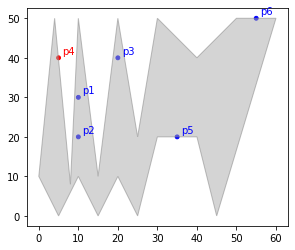

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

ax = plt.gca()
line1 = [ [p.x, p.y] for p in polygon1[0] ]
pg1 = plt.Polygon(line1, closed=True, fill=True, 
                  facecolor='#AAAAAA', edgecolor='grey', alpha=0.5)
ax.add_patch(pg1)

pts = [p1, p2, p3, p4, p5, p6]
inout = lambda pip: 1 if pip is True else 0
results = [inout(pip_cross2(p, polygon1)[0]) for p in pts]

colors = [['red', 'blue'][i] for i in results]
l2 = plt.scatter([p.x for p in pts], [p.y for p in pts], color=colors, s=15)
labels = ['p%s'%(i+1) for i in range(len(pts))]
for i, p in enumerate(pts):
    plt.text(p.x+1, p.y+1, labels[i], color=colors[i])
  
ax.set_aspect(1)
plt.show()

Note the above code assumes the polygon is properly closed. If we cannot guarantee, the actual code will be more tedious because we will have to use the try statement:

In [22]:
points2 = [ [0,10], [5,0], [10,10], [15,0], [20,10] ]
polygon2 = [ [ Point(p[0], p[1]) for p in points2 ] ]

try:
    print("Point %s is %s"%(p1, 'IN' if pip_cross2(p1, polygon2)[0] is True else 'OUT'))
except Exception as err:
    print(err)

Polygon not closed


## Case study: Centroids

Why the centroid formula looks like what is presented before? Why not we just calculate the mean values of the X and Y coordinates of the points of the polygon? Here we will use an example to demonstrate this. (Again, the first line of code is not needed for Python interpreter other than the iPython notebook.)

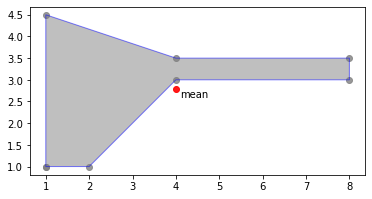

In [14]:
points = [ [1,1], [2,1], [4,3], [8,3], [8,3.5], [4,3.5], [1,4.5], [1,1] ]

polygon = [ Point(p[0], p[1]) for p in points ]

# TODO: compute the mean of the X coordinates in polygon as x
#       make sure the point at (1, 1) is only used once
x = sum([p.x for p in polygon[:-1]]) / (len(polygon)-1)

# TODO: compute the mean of the Y coordinates in polygon as y
#       make sure the point at (1, 1) is only used once
y = sum([p.y for p in polygon[:-1]]) / (len(polygon)-1)

d = Point(x, y)

_, ax = plt.subplots()

line1 = [ [p.x, p.y] for p in polygon ]
l1 = plt.Polygon(line1, closed=True, fill=True, facecolor='grey', edgecolor='blue', alpha=0.5)
ax.add_patch(l1)

ax.scatter([p.x for p in polygon], [p.y for p in polygon], color='grey', marker='o', alpha=0.8)

ax.plot(d.x, d.y, marker='o', color='red', alpha=.9)
ax.text(d.x+0.1, d.y-0.2, 'mean')

ax.set_aspect(1)

plt.show()


In [15]:
d

Point(4.0, 2.7857142857142856)

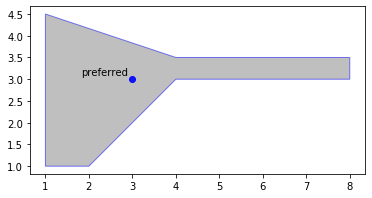

In [7]:
_, ax = plt.subplots()

line1 = [ [p.x, p.y] for p in polygon ]
l1 = plt.Polygon(line1, closed=True, fill=True, facecolor='grey', edgecolor='blue', alpha=0.5)
ax.add_patch(l1)

# TODO: what would be the coordinates for a centroid that is more preferred?
#       use any reasonable numbers below
preferred = Point(3, 3)

ax.plot(preferred.x, preferred.y, color='blue', marker='o', alpha=.9)
plt.text(preferred.x-0.1, preferred.y+0.1, 'preferred', ha='right')

ax.set_aspect(1)
plt.show()


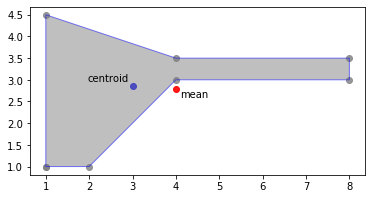

In [8]:
points = [ [1,1], [2,1], [4,3], [8,3], [8,3.5], [4,3.5], [1,4.5], [1,1] ]

polygon = [ Point(p[0], p[1]) for p in points ]

# TODO: compute the mean of the X coordinates in polygon as x
#       make sure the point at (1, 1) is only used once
x = sum([p.x for p in polygon[:-1]]) / (len(polygon)-1)

# TODO: compute the mean of the Y coordinates in polygon as y
#       make sure the point at (1, 1) is only used once
y = sum([p.y for p in polygon[:-1]]) / (len(polygon)-1)

_, ax = plt.subplots()

line1 = [ [p.x, p.y] for p in polygon ]
l1 = plt.Polygon(line1, closed=True, fill=True, facecolor='grey', edgecolor='blue', alpha=0.5)
ax.add_patch(l1)

ax.scatter([p.x for p in polygon], [p.y for p in polygon], color='grey', marker='o', alpha=0.8)

# TODO: 
#       calculate the centroid of the polygon
#       plot it here
#       draw a label next to the centroid
#
a, c = centroid(polygon)
plt.scatter([c.x], [c.y], color='blue', alpha=.9)
plt.text(c.x-0.1, c.y+0.1, 'centroid', ha='right')

d = Point(x, y)
plt.scatter([d.x], [d.y], color='red', alpha=.9)
plt.text(d.x+0.1, d.y-0.2, 'mean')

ax.set_aspect(1)
plt.show()


The centroid (gravity center) can still be outside the polygon (see questions below). This can be a problem when we really want it to be inside. [Here](../lectures/visual_center.pdf) ([link](https://www.mapbox.com/blog/polygon-center/)) is a method to get the visual center of a polygon that is bound to be inside the polygon.

In [ ]:
# TODO: design a polygon so that its centroid is outside the polygon
#   
points = [ [1,1], [2,1], [2,4], [5,4], [5,1], [6,1], [6,5], [1,5], [1,1] ]

polygon = [ Point(p[0], p[1]) for p in points ]

_, ax = plt.subplots()

line1 = [ [p.x, p.y] for p in polygon ]
l1 = plt.Polygon(line1, closed=True, fill=True, facecolor='grey', edgecolor='blue', alpha=0.5)
ax.add_patch(l1)

ax.scatter([p.x for p in polygon], [p.y for p in polygon], color='grey', marker='o', alpha=0.8)

# TODO: calculate the centroid of the polygon and plot it here
#
a, c = centroid(polygon)
plt.scatter([c.x], [c.y], color='blue', alpha=.9)
plt.text(c.x-0.1, c.y+0.1, 'centroid', ha='right')

ax.set_aspect(1)
plt.show()


## Case study: Polygon area using Monte Carlo simulation

We are going to use what we have learned so far to do an experiment. First, let's make a triangle that has a minimal bounding box (envelope) defined as [0, 10, 0, 10], which are the lower bound and upper bound of x, and that of y, respectively. Now we randomly generate 100 points and count how many points are within the triangle. What is the proportion of the points within the triangle? This should give us an estimate of the area of the triangle. But this is just one estimation. If we do this again, we would get a different answer. If we repeat this process 100 times, each time we have an estimate of the size of the triangle and we can plot a histogram that should tell us a lot about the size of the triangle. We can calculate the mean of all the estimated sizes. We can also draw the points with the triangle to get some kind of visual proof. This experiment can go on (for example, we can use 1000 points instead of 100) and the more we do the more we will learn some fundamental scientific concepts, such as computational geometry and Monte Carlo simulation. 

## <font color="red">Questions</font>

Submit answers to the following questions to carmen by 11:59 PM tomorrow.

**Question 1**. Submit the complete the code from case study (1).

**Question 2.** After you finish case study 2, submit the code in .py and everything else in .pdf. Full credit will be given for submissions with a screen shot of the plot with the triangle, random points, bounding box, and a histogram of the estimated values. To draw a histogram in Python, you will need a variable to hold the values (in our case the count). For example, you can use `plt.hist(counts)` to draw the values in list `counts`.

**Question 3.** Describe function `pip_cross2` listed above line-by-line. It is important that literally each line must be explained. Please read section 2.6 of the textbook (*GIS Algorithms*) to correctly interpret code line 5 from the bottom. (Please note the function listed in this lecture note is different from that in the textbook, but the mechanism is the same.)